In [1]:
import cadquery as cq
import numpy as np


alto = 79  # + 6 de alto de la porcelana = 85
largo = 60
ancho = 80  # + 2 de ancho de la porcelana que vuela 1cm en el contorno

ancho / 3

26.666666666666668

In [2]:
# patas
p = cq.Workplane("XZ")
p = p.pushPoints([(-ancho/2 + 1.5,  largo/2 - 2.5),
                  ( ancho/2 - 1.5,  largo/2 - 2.5),
                  ( ancho/2 - 1.5, -largo/2 + 2.5),
                  (-ancho/2 + 1.5, -largo/2 + 2.5)])
p = p.box(3, 5, alto, centered=(True, True, False))

In [16]:
# trave
t = cq.Workplane("XZ")
t = t.pushPoints([(0,  largo/2 - 1.5),
                  (0, -largo/2 + 1.5, 10)])
t = t.box(ancho, 3, 8, centered=(True, True, False))

In [4]:
# tapa frontal
tf = cq.Workplane("XZ")
tf = tf.pushPoints([(0,  largo/2 - 1.5, 8),])
tf = tf.box(ancho / 3, 3, 7, centered=(True, True, False))
tf = tf.pushPoints([(0,  largo/2 - 1.5, 14),])
tf = tf.box(ancho, 3, 3, centered=(True, True, False))


In [5]:
# riel
r = cq.Workplane("XZ")
r = r.pushPoints([
    (-ancho/2, 0),
    (-1.2 + ancho/2, 0)
])
r = r.box(1.2, largo, 18, centered=(False, True, False))

In [6]:
# sub trave
st = cq.Workplane("XZ")
st = st.pushPoints([(0,  largo/2 - 1.5, 60),
                    (0, -largo/2 + 1.5, 60)])
st = st.box(ancho, 3, 3, centered=(True, True, True))


In [7]:
# rack
rk = cq.Workplane("XZ")
rk = rk.pushPoints(
    [(m, 0, 57) for m in np.arange(-ancho/2+3.5, ancho/2-2, 5)]
)
rk = rk.box(3, largo, 2, centered=(False, True, False))

In [17]:

ass_p = cq.Assembly(p + t + tf + st + rk + r, color=cq.Color(0.9, 0.7, 0.4, 1))

ass_p

In [9]:
from cadquery import exporters

result = p + t + tf + st + rk + r
exporters.export(
    result,
    "vanity.svg",
    opt={
        "width": 600,
        "height": 600,
        "marginLeft": 10,
        "marginTop": 10,
        "showAxes": False,
        "projectionDir": (0.5, 0.5, 0.5),
        "strokeWidth": 0.2,
        "strokeColor": (22, 42, 42),
        "hiddenColor": (120, 120, 50),
        "showHidden": False,
    },
)


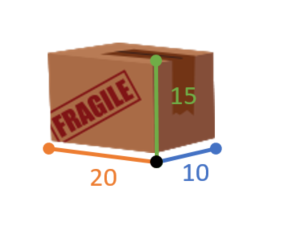
En esta caja hemos tomado las tres medidas: 15 cm de alto, 20 cm de largo y 10 cm de ancho.
